In [ ]:
pip install pandas torch

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 2.3 MB/s eta 0:00:05
   - -------------------------------------- 0.5/11.0 MB 2.3 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/11.0 MB 960.1 kB/s eta 0:00:11
   -- ------------------------------------- 0.8/11.0 MB 960.1 kB/s eta 0:00:11
   --- ------------------------------------ 1.0/11.0 MB 711.9 kB/s eta 0:00:14
   ---- ----------------------------------- 1.3/11.0 MB 837.0 kB/s eta 0:00:12
   ----- ---------------------------------- 1.6/11.0 MB 959.5 kB/s eta 0:00:10
   ----- ---------------------------------- 1.6/11.0 MB 959.5 kB/s eta 0:00:10
   ------ --------------------------------- 1.8/11.0 MB 822.8 kB/s eta 0:00:12
   -------- ------------------------------- 2.4/11.0 MB 980.7 kB/s eta 0:00


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 1.5 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/10.7 MB 2.0 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/10.7 MB 2.0 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/10.7 MB 1.3 MB/s eta 0:00:08
   ---- ----------------------------------- 1.3/10.7 MB 1.3 MB/s eta 0:00:08
   ------ --------------------------------- 1.8/10.7 MB 1.2 MB/s eta 0:00:08
   ------- -------------------------------- 2.1/10.7 MB 1.3 MB/s eta 0:00:07
   ------- -------------------------------- 2.1/10.7 MB 1.3 MB/s eta 0:00:07
   -------- ------------------------------- 2.4/10.7 MB 1.1 MB/s eta 0:00:08
   ---------- -----


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install numpy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 757.1 kB/s eta 0:00:10
   -- ------------------------------------- 0.5/8.1 MB 757.1 kB/s eta 0:00:10
   -- ------------------------------------- 0.5/8.1 MB 757.1 kB/s eta 0:00:10
   --- ------------------------------------ 0.8/8.1 MB 544.7 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/8.1 MB 544.7 kB/s eta 0:00:14
   ----- ---------------------------------- 1.0/8.1 MB 586.3 kB/s eta 0:00:12
   ----- ---------------------------------- 1.0/8.1 MB 586.3 kB/s eta 0:00:12
   ------ --------------------------------- 1.3/8.1 MB 570.6 kB/s eta 0:00:12
   ------ ------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------------------------------ --- 1.3/1.5 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


In [3]:
#Read data
meningitis = pd.read_csv(r'E:\Learning\NEU\Amal Lab\Meningitis paper\full_encoded_meningitis.csv')
nonmeningitis = pd.read_csv(r'E:\Learning\NEU\Amal Lab\Meningitis paper\full_encoded_non_meningitis.xls')

In [4]:
print(meningitis.shape)
print(nonmeningitis.shape)
print(meningitis.head)
print(nonmeningitis.head)

(214, 983)
(46303, 6962)
<bound method NDFrame.head of      SUBJECT_ID  GENDER  00845  0090  0270  0362  0380  03811  03812  03819  \
0         10144       0      0     0     0     0     0      0      1      0   
1         10316       1      0     0     0     0     0      0      0      0   
2         10361       0      1     0     0     0     0      0      0      0   
3         10614       1      0     0     0     0     0      0      0      0   
4         11093       0      0     0     0     0     0      0      0      0   
..          ...     ...    ...   ...   ...   ...   ...    ...    ...    ...   
209         994       0      0     0     0     0     0      0      0      0   
210        9971       0      0     0     0     0     0      0      0      0   
211       99776       1      0     0     0     0     0      0      0      0   
212        9981       0      0     0     0     0     0      0      0      0   
213       99957       1      0     0     0     0     0      0      0      0 

In [5]:
# Ramdonly extract 180 samples for training set and 34 samples for testing set in meningitis cohort
men_180 = meningitis.sample(n=180, random_state=42)
men_34 = meningitis.drop(men_180.index)

In [6]:
print(men_180.head)
print(men_34.head)

<bound method NDFrame.head of      SUBJECT_ID  GENDER  00845  0090  0270  0362  0380  03811  03812  03819  \
9          1241       1      0     0     0     0     0      0      0      0   
197       87279       1      0     0     0     0     0      0      0      0   
66        25995       1      0     0     0     0     0      0      0      0   
191       83132       1      0     0     0     0     0      0      0      0   
117       48876       0      1     0     0     0     0      0      0      0   
..          ...     ...    ...   ...   ...   ...   ...    ...    ...    ...   
54        23385       1      0     0     0     0     0      0      0      0   
107       44793       0      0     0     0     0     0      0      0      0   
50        22894       0      0     0     0     0     0      0      0      0   
174        7466       1      0     0     0     0     0      0      0      0   
210        9971       0      0     0     0     0     0      0      0      0   

     ...  V600  V602 

In [7]:
# Ramdonly extract 38955 samples for training set and 7348 samples for testing set in the non-meningitis cohort
non_men_38955 = nonmeningitis.sample(n=38955, random_state=42)
non_men_7348 = nonmeningitis.drop(non_men_38955.index)

In [22]:
# Ramdonly extract 180 and 8000 samples for training set in the non-meningitis cohort
non_men_180 = non_men_38955.sample(n=180, random_state=42)
non_men_8000 = non_men_38955.sample(n=8000, random_state=42)

In [9]:
print(non_men_38955.head)
print(non_men_7348.head)

<bound method NDFrame.head of        SUBJECT_ID  GENDER  0030  0031  0038  0039  0041  0048  0049  0051  \
27088       47410       1     0     0     0     0     0     0     0     0   
36936       74284       1     0     0     0     0     0     0     0     0   
35360       69781       1     0     0     0     0     0     0     0     0   
40875        8507       0     0     0     0     0     0     0     0     0   
29586       54172       1     0     0     0     0     0     0     0     0   
...           ...     ...   ...   ...   ...   ...   ...   ...   ...   ...   
27370       48149       1     0     0     0     0     0     0     0     0   
8399        18031       1     0     0     0     0     0     0     0     0   
9079        18692       0     0     0     0     0     0     0     0     0   
524         10495       0     0     0     0     0     0     0     0     0   
42392        8930       1     0     0     0     0     0     0     0     0   

       ...  V8811  V8812  V8821  V9010  V902 

In [10]:
# Combine data for training set and testing set
training_combined = pd.concat([men_180, non_men_38955], ignore_index = True)
testing_combined = pd.concat([men_34, non_men_7348], ignore_index = True)

In [23]:
# Combine data for training set of 360 and 8000 samples
# Note: This is a separate training set with only 360 and 8000 samples from the non-meningitis cohort
# This is useful for testing purposes or small-scale experiments
training_combined_360 = pd.concat([men_180, non_men_180], ignore_index = True)
training_combined_8180 = pd.concat([men_180, non_men_8000], ignore_index = True)

In [26]:
# Drop SUBJECT_ID
training_ID_Drop = training_combined.drop('SUBJECT_ID', axis = 1)
testing_ID_Drop = testing_combined.drop('SUBJECT_ID', axis = 1)
training_ID_Drop_360 = training_combined_360.drop('SUBJECT_ID', axis = 1)
training_ID_Drop_8180 = training_combined_8180.drop('SUBJECT_ID', axis = 1)

In [29]:
# Shuffle the datasets to ensure random distribution
training_shuffled = training_ID_Drop.sample(frac=1, random_state=42).reset_index(drop=True)
testing_shuffled = testing_ID_Drop.sample(frac=1, random_state=42).reset_index(drop=True)
training_shuffled_360 = training_ID_Drop_360.sample(frac=1, random_state=42).reset_index(drop=True)
training_shuffled_8180 = training_ID_Drop_8180.sample(frac=1, random_state=42).reset_index(drop=True)

In [30]:
print(training_shuffled.shape)
print(testing_shuffled.shape)
print(training_shuffled_360.shape)
print(training_shuffled_8180.shape)

(39135, 6984)
(7382, 6984)
(360, 6984)
(8180, 6984)


In [15]:
# Check for NaN values in each dataset
print("NaN values in training data:\n", training_shuffled.isnull().sum())
print("NaN values in testing data:\n", testing_shuffled.isnull().sum())
print("NaN values in training data (180 samples):\n", training_shuffled_360.isnull().sum())

NaN values in training data:
 GENDER      0
00845       0
0090        0
0270        0
0362        0
         ... 
V902      180
V9039     180
V9081     180
V9089     180
V9103     180
Length: 6984, dtype: int64
NaN values in testing data:
 GENDER     0
00845      0
0090       0
0270       0
0362       0
          ..
V902      34
V9039     34
V9081     34
V9089     34
V9103     34
Length: 6984, dtype: int64
NaN values in training data (180 samples):
 GENDER      0
00845       0
0090        0
0270        0
0362        0
         ... 
V902      180
V9039     180
V9081     180
V9089     180
V9103     180
Length: 6984, dtype: int64


In [31]:
# Replace NaN values with 0 in each dataset
df_training = training_shuffled.fillna(0)
df_testing = testing_shuffled.fillna(0)
df_training_360 = training_shuffled_360.fillna(0)
df_training_8180 = training_shuffled_8180.fillna(0)


# Verify if NaN values are replaced
print("NaN values in df_training:\n", df_training.isnull().sum())
print("\nNaN values in df_testing:\n", df_testing.isnull().sum())
print("\nNaN values in df_training_180:\n", df_training_360.isnull().sum())
print("\nNaN values in df_training_8000:\n", df_training_8180.isnull().sum())

NaN values in df_training:
 GENDER    0
00845     0
0090      0
0270      0
0362      0
         ..
V902      0
V9039     0
V9081     0
V9089     0
V9103     0
Length: 6984, dtype: int64

NaN values in df_testing:
 GENDER    0
00845     0
0090      0
0270      0
0362      0
         ..
V902      0
V9039     0
V9081     0
V9089     0
V9103     0
Length: 6984, dtype: int64

NaN values in df_training_180:
 GENDER    0
00845     0
0090      0
0270      0
0362      0
         ..
V902      0
V9039     0
V9081     0
V9089     0
V9103     0
Length: 6984, dtype: int64

NaN values in df_training_8000:
 GENDER    0
00845     0
0090      0
0270      0
0362      0
         ..
V902      0
V9039     0
V9081     0
V9089     0
V9103     0
Length: 6984, dtype: int64


In [ ]:
# Train Random Forest model
def train_RF(df, batch_size=64, n_splits=5, n_estimators=500):

    # Separate features and target variable
    X = df.drop('CLASSIFIER', axis=1).values
    y = df['CLASSIFIER'].values

    # Cross-validation setup
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    metrics = {'AUC': [], 'Sensitivity': [], 'Specificity': [], 'PPV': [], 'NPV': [], 'F1-score': []}

    fold_number = 1
    fpr_list = []
    tpr_list = []

    # Print the training dataset size
    print(f"Training Random Forest with {X.shape[0]} samples:")

    for train_index, test_index in skf.split(X, y):
        df_name = [name for name, val in globals().items() if val is df][0]  # Extract df's variable name

        # Split data
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Convert data to numpy arrays
        X_train = X_train.astype(np.float32)
        X_test = X_test.astype(np.float32)

        # Define and train Random Forest model
        model = RandomForestClassifier(n_estimators=n_estimators, n_jobs=-1)
        model.fit(X_train, y_train)

        # Predictions
        y_pred_probs = model.predict_proba(X_test)[:, 1]  # Probability of class 1
        y_pred = (y_pred_probs >= 0.3).astype(int)  # Convert probabilities to predictions

        # Calculate metrics
        auc = roc_auc_score(y_test, y_pred_probs)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        ppv = tp / (tp + fp) if (tp + fp) > 0 else np.nan
        npv = tn / (tn + fn) if (tn + fn) > 0 else np.nan
        f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity) if (ppv + sensitivity) > 0 else np.nan

        # Append metrics for the fold
        metrics['AUC'].append(auc)
        metrics['Sensitivity'].append(sensitivity)
        metrics['Specificity'].append(specificity)
        metrics['PPV'].append(ppv)
        metrics['NPV'].append(npv)
        metrics['F1-score'].append(f1)

        # Collect data for plotting ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
        fpr_list.append(fpr)
        tpr_list.append(tpr)

        fold_number += 1

    # Calculate mean and 95% CI for each metric
    def compute_mean_ci(values):
        mean = np.mean(values)
        lower = np.percentile(values, 2.5)
        upper = np.percentile(values, 97.5)
        return mean, (lower, upper)

    for metric, values in metrics.items():
        mean, ci = compute_mean_ci(values)
        print(f"{metric}: {mean:.4f} (95% CI: {ci[0]:.4f} - {ci[1]:.4f})")

    # Plot ROC curve for each fold
    plt.figure(figsize=(10, 6))
    for i in range(n_splits):
        plt.plot(fpr_list[i], tpr_list[i], label=f'Fold {i+1} (AUC = {metrics["AUC"][i]:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve of {df_name} using Random Forest")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    return model

Training Random Forest with 8180 samples:
AUC: 0.9964 (95% CI: 0.9880 - 1.0000)
Sensitivity: 0.9167 (95% CI: 0.8389 - 0.9694)
Specificity: 0.9996 (95% CI: 0.9988 - 1.0000)
PPV: 0.9835 (95% CI: 0.9485 - 1.0000)
NPV: 0.9981 (95% CI: 0.9964 - 0.9993)
F1-score: 0.9477 (95% CI: 0.9123 - 0.9702)


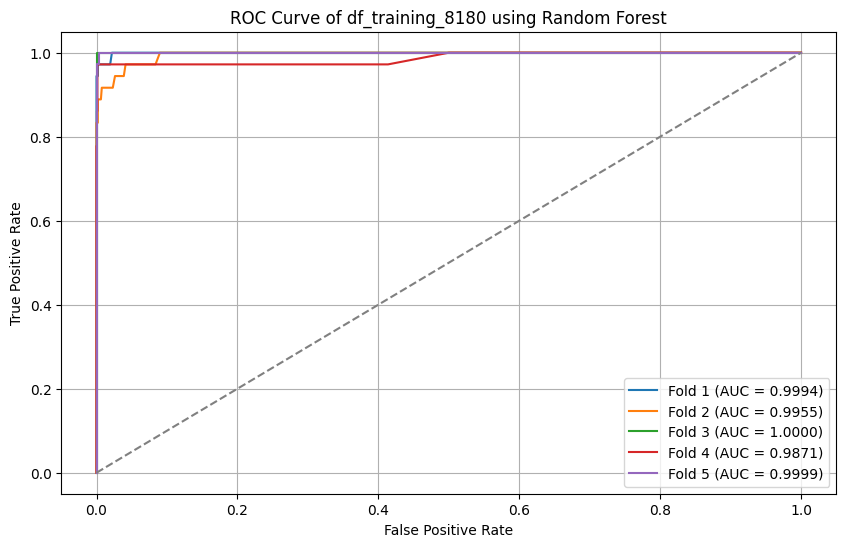

In [111]:
# Train models on different datasets
model_RF_8180 = train_RF(df_training_8180)

Training Random Forest with 360 samples:
AUC: 0.9640 (95% CI: 0.9108 - 0.9903)
Sensitivity: 0.9833 (95% CI: 0.9722 - 1.0000)
Specificity: 0.7000 (95% CI: 0.5417 - 0.7778)
PPV: 0.7699 (95% CI: 0.6802 - 0.8182)
NPV: 0.9749 (95% CI: 0.9510 - 1.0000)
F1-score: 0.8628 (95% CI: 0.8002 - 0.9000)


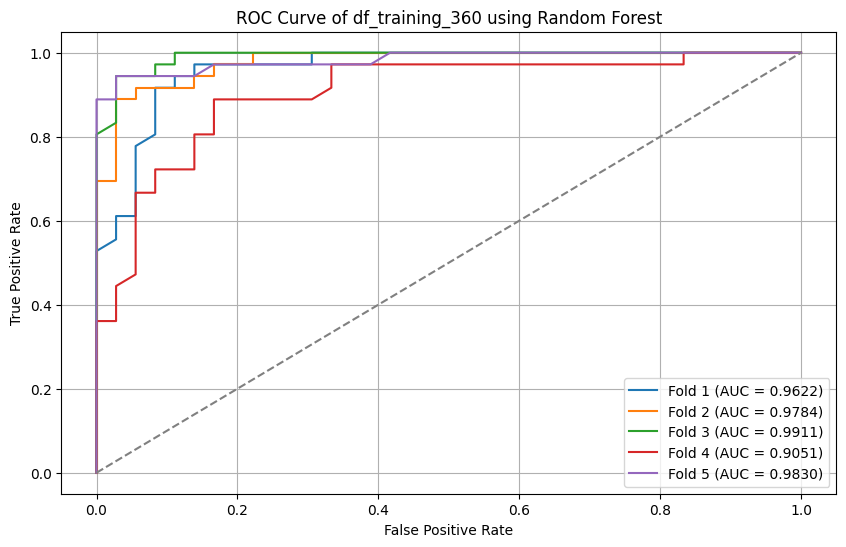

In [112]:
model_RF_360 = train_RF(df_training_360)

Training Random Forest with 39135 samples:
AUC: 0.9982 (95% CI: 0.9920 - 1.0000)
Sensitivity: 0.8667 (95% CI: 0.8083 - 0.9389)
Specificity: 1.0000 (95% CI: 1.0000 - 1.0000)
PPV: 1.0000 (95% CI: 1.0000 - 1.0000)
NPV: 0.9994 (95% CI: 0.9991 - 0.9997)
F1-score: 0.9279 (95% CI: 0.8940 - 0.9684)


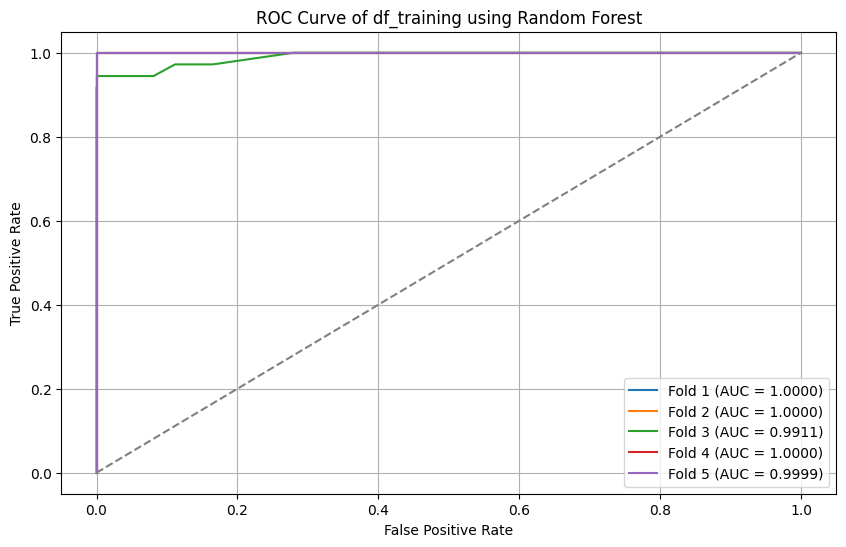

In [ ]:
model_RF_39135 = train_RF(df_training)

In [ ]:
# Build evaluate_model function for model training
def evaluate_model(model, df, batch_size=64):
    # Separate features and target variable
    X = df.drop('CLASSIFIER', axis=1).values
    y = df['CLASSIFIER'].values

    # Make predictions directly with scikit-learn
    y_pred_probs = model.predict_proba(X)[:, 1]  # Probability of class 1
    y_pred = (np.array(y_pred_probs) >= 0.3).astype(int)

    # Extract model's variable name from globals
    model_name = [name for name, val in globals().items() if val is model]
    if model_name:
        print(f"Evaluation on testing data with {model_name[0]}:")
    else:
        print(f"Evaluation on testing data with {model.__class__.__name__}:")

    # Calculate metrics
    metrics = {}
    metrics['AUC'] = roc_auc_score(y, y_pred_probs)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    metrics['Sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0
    metrics['Specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
    metrics['PPV'] = tp / (tp + fp) if (tp + fp) > 0 else 0
    metrics['NPV'] = tn / (tn + fn) if (tn + fn) > 0 else 0

    # Calculate F1-score
    sensitivity = metrics['Sensitivity']
    ppv = metrics['PPV']
    metrics['F1'] = 2 * (ppv * sensitivity) / (ppv + sensitivity) if (ppv + sensitivity) > 0 else 0

    # Print metrics
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


In [121]:
# Evaluate the models
print(evaluate_model(model_RF_8180, df_testing))

Evaluation on testing data with model_RF_8180:
AUC: 1.0000
Sensitivity: 0.9118
Specificity: 0.9999
PPV: 0.9688
NPV: 0.9996
F1: 0.9394
None


In [122]:
print(evaluate_model(model_RF_360, df_testing))

Evaluation on testing data with model_RF_360:
AUC: 0.9923
Sensitivity: 1.0000
Specificity: 0.6747
PPV: 0.0140
NPV: 1.0000
F1: 0.0277
None


In [123]:
print(evaluate_model(model_RF_39135, df_testing))

Evaluation on testing data with model_RF_39135:
AUC: 1.0000
Sensitivity: 0.8824
Specificity: 1.0000
PPV: 1.0000
NPV: 0.9995
F1: 0.9375
None


In [ ]:
#########################################################################

In [124]:
# Train LightGBM model
def train_LightGBM(df, batch_size=64, n_splits=5, n_estimators=100):
    # Separate features and target variable
    X = df.drop('CLASSIFIER', axis=1).values
    y = df['CLASSIFIER'].values

    # Cross-validation setup
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    metrics = {'AUC': [], 'Sensitivity': [], 'Specificity': [], 'PPV': [], 'NPV': [], 'F1-score': []}

    fold_number = 1
    fpr_list = []
    tpr_list = []

    print(f"Training LightGBM with {X.shape[0]} samples:")

    for train_index, test_index in skf.split(X, y):
        df_name = [name for name, val in globals().items() if val is df][0]  # Extract df's variable name

        # Split data
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Convert data to numpy arrays
        X_train = X_train.astype(np.float32)
        X_test = X_test.astype(np.float32)

        # Calculate class weights
        pos_weight = len(y[y==0]) / len(y[y==1])  # Ratio of negative to positive

        # Modify your model:
        model = lgb.LGBMClassifier(
            n_estimators=500,      # More trees
            learning_rate=0.02,    # Lower learning rate
            max_depth=10,          # Deeper trees
            num_leaves=100,        # More leaves
            min_child_samples=5,   # Smaller minimum samples
            subsample=0.85,        # Slight increase
            colsample_bytree=0.85, # Slight increase
            scale_pos_weight=pos_weight,
            reg_alpha=0.05,        # Lighter regularization
            reg_lambda=0.05,       # Lighter regularization
            random_state=42,
            verbose=-1,
            boost_from_average=False,  # Sometimes helps with imbalanced data
            bagging_freq=5,        # Bagging frequency
            feature_fraction=0.8   # Feature sampling
        )
        model.fit(X_train, y_train)

        # Predictions
        y_pred_probs = model.predict_proba(X_test)[:, 1]  # Probability of class 1

        # Advanced threshold optimization
        y_pred = (y_pred_probs >= 0.3).astype(int)

        # Calculate metrics
        auc = roc_auc_score(y_test, y_pred_probs)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        ppv = tp / (tp + fp) if (tp + fp) > 0 else np.nan
        npv = tn / (tn + fn) if (tn + fn) > 0 else np.nan

        # Calculate F1-score
        f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity) if (ppv + sensitivity) > 0 else np.nan

        # Append metrics for the fold
        metrics['AUC'].append(auc)
        metrics['Sensitivity'].append(sensitivity)
        metrics['Specificity'].append(specificity)
        metrics['PPV'].append(ppv)
        metrics['NPV'].append(npv)
        metrics['F1-score'].append(f1)

        # Collect data for plotting ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
        fpr_list.append(fpr)
        tpr_list.append(tpr)

        fold_number += 1

    # Calculate mean and 95% CI for each metric
    def compute_mean_ci(values):
        mean = np.mean(values)
        lower = np.percentile(values, 2.5)
        upper = np.percentile(values, 97.5)
        return mean, (lower, upper)

    for metric, values in metrics.items():
        mean, ci = compute_mean_ci(values)
        print(f"{metric}: {mean:.4f} (95% CI: {ci[0]:.4f} - {ci[1]:.4f})")

    # Calculate and display average F1-score
    avg_f1 = np.mean(metrics['F1-score'])
    print(f"F1-Score Across Folds: {avg_f1:.4f}")

    # Plot ROC curve for each fold
    plt.figure(figsize=(6, 6))
    for i in range(n_splits):
        plt.plot(fpr_list[i], tpr_list[i], label=f'Fold {i+1} (AUC = {metrics["AUC"][i]:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve of {df_name} using LightGBM")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    return model

Training LightGBM with 8180 samples:


C:\Users\hanks\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\hanks\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\hanks\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\hanks\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\hanks\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LG

AUC: 0.9739 (95% CI: 0.9464 - 0.9996)
Sensitivity: 0.8722 (95% CI: 0.7528 - 0.9972)
Specificity: 0.9994 (95% CI: 0.9988 - 0.9999)
PPV: 0.9683 (95% CI: 0.9345 - 0.9973)
NPV: 0.9971 (95% CI: 0.9945 - 0.9999)
F1-score: 0.9152 (95% CI: 0.8338 - 0.9849)
F1-Score Across Folds: 0.9152


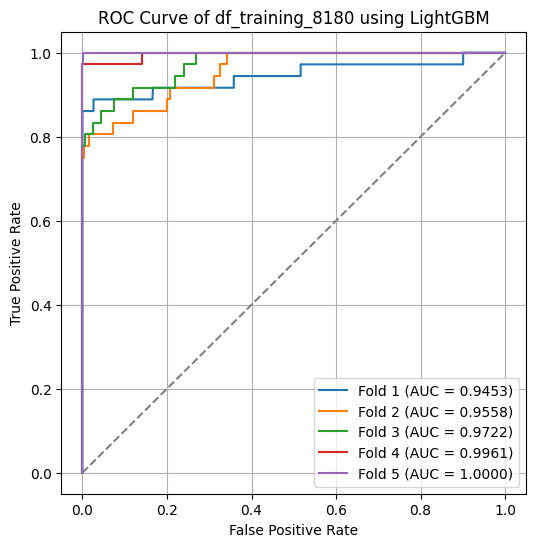

In [125]:
# Train LightGBM models on different datasets
model_LGBM_8180 = train_LightGBM(df_training_8180)

Training LightGBM with 360 samples:


C:\Users\hanks\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\hanks\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\hanks\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\hanks\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


AUC: 0.9772 (95% CI: 0.9459 - 0.9892)
Sensitivity: 0.9278 (95% CI: 0.8917 - 0.9694)
Specificity: 0.9444 (95% CI: 0.8944 - 0.9722)
PPV: 0.9443 (95% CI: 0.8994 - 0.9721)
NPV: 0.9296 (95% CI: 0.8972 - 0.9691)
F1-score: 0.9356 (95% CI: 0.9147 - 0.9693)
F1-Score Across Folds: 0.9356


C:\Users\hanks\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


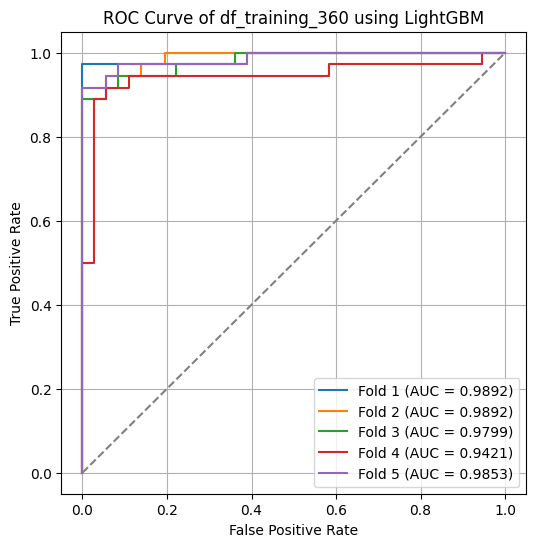

In [126]:
model_LGBM_360 = train_LightGBM(df_training_360)

Training LightGBM with 39135 samples:


C:\Users\hanks\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\hanks\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\hanks\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\hanks\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\hanks\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LG

AUC: 0.9778 (95% CI: 0.9603 - 0.9972)
Sensitivity: 0.9278 (95% CI: 0.8667 - 0.9694)
Specificity: 0.9998 (95% CI: 0.9995 - 1.0000)
PPV: 0.9673 (95% CI: 0.8971 - 1.0000)
NPV: 0.9997 (95% CI: 0.9994 - 0.9999)
F1-score: 0.9463 (95% CI: 0.9062 - 0.9845)
F1-Score Across Folds: 0.9463


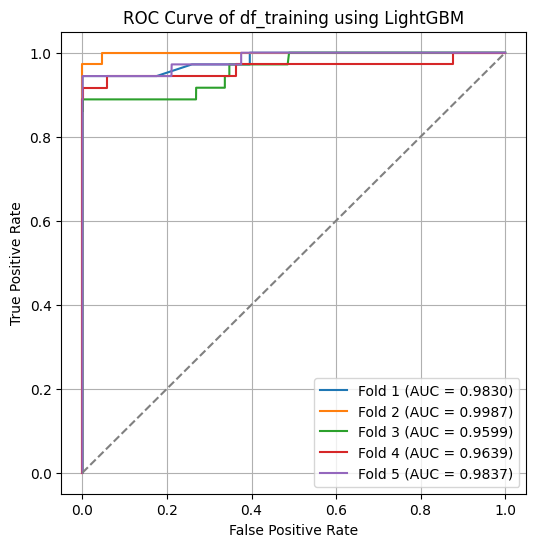

In [127]:
model_LGBM_39135 = train_LightGBM(df_training)

In [128]:
# Evaluate LightGBM models
print(evaluate_model(model_LGBM_8180, df_testing))

C:\Users\hanks\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Evaluation on testing data with model_LGBM_8180:
AUC: 0.9986
Sensitivity: 0.9412
Specificity: 0.9999
PPV: 0.9697
NPV: 0.9997
F1: 0.9552
None


In [129]:
print(evaluate_model(model_LGBM_360, df_testing))

C:\Users\hanks\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Evaluation on testing data with model_LGBM_360:
AUC: 0.9961
Sensitivity: 0.9706
Specificity: 0.9446
PPV: 0.0750
NPV: 0.9999
F1: 0.1392
None


In [130]:
print(evaluate_model(model_LGBM_39135, df_testing))

C:\Users\hanks\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Evaluation on testing data with model_LGBM_39135:
AUC: 0.9976
Sensitivity: 0.9412
Specificity: 0.9999
PPV: 0.9697
NPV: 0.9997
F1: 0.9552
None


In [ ]:
#######################################################################################

In [139]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Train SVM model
def train_SVM(df, batch_size=64, n_splits=5, C=1.0, gamma='scale'):
    # Separate features and target variable
    X = df.drop('CLASSIFIER', axis=1).values
    y = df['CLASSIFIER'].values
    
    # Cross-validation setup
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    metrics = {'AUC': [], 'Sensitivity': [], 'Specificity': [], 'PPV': [], 'NPV': [], 'F1-score': []}
    
    fold_number = 1
    fpr_list = []
    tpr_list = []
    
    # Print the training dataset size
    print(f"Training SVM with {X.shape[0]} samples:")

    # Define threshold optimization function
    def find_optimal_threshold(y_true, y_pred_probs, metric='f1'):
        fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
        
        scores = []
        for threshold in thresholds:
            y_pred_temp = (y_pred_probs >= threshold).astype(int)
            tn, fp, fn, tp = confusion_matrix(y_true, y_pred_temp).ravel()
            
            sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
            ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
            
            if metric == 'f1':
                score = 2 * (ppv * sensitivity) / (ppv + sensitivity) if (ppv + sensitivity) > 0 else 0
            elif metric == 'balanced':
                score = 0.6 * sensitivity + 0.4 * ppv
            
            scores.append(score)
        
        optimal_idx = np.argmax(scores)
        return thresholds[optimal_idx]
    
    for train_index, test_index in skf.split(X, y):
        df_name = [name for name, val in globals().items() if val is df][0]
        
        # Split data
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Convert data to numpy arrays
        X_train = X_train.astype(np.float32)
        X_test = X_test.astype(np.float32)
        
        # Scale features (important for SVM)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Calculate class weights
        pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])
        class_weight = {0: 1, 1: pos_weight}
        
        # Define and train SVM model
        model = SVC(
            C=10,
            gamma='scale',
            kernel='rbf',  # RBF kernel
            class_weight=class_weight,
            probability=True,  # Enable probability estimates
            random_state=42
        )
        
        model.fit(X_train_scaled, y_train)
        
        # Predictions
        y_pred_probs = model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1
        
        # Find optimal threshold
        optimal_threshold = find_optimal_threshold(y_test, y_pred_probs, 'balanced')
        y_pred = (y_pred_probs >= optimal_threshold).astype(int)
        
        # Calculate metrics
        auc = roc_auc_score(y_test, y_pred_probs)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
        npv = tn / (tn + fn) if (tn + fn) > 0 else 0
        
        # Calculate F1-score
        f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity) if (ppv + sensitivity) > 0 else 0
        
        # Append metrics for the fold
        metrics['AUC'].append(auc)
        metrics['Sensitivity'].append(sensitivity)
        metrics['Specificity'].append(specificity)
        metrics['PPV'].append(ppv)
        metrics['NPV'].append(npv)
        metrics['F1-score'].append(f1)
        
        # Collect data for plotting ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
        
        fold_number += 1
    
    # Calculate mean and 95% CI for each metric
    def compute_mean_ci(values):
        mean = np.mean(values)
        lower = np.percentile(values, 2.5)
        upper = np.percentile(values, 97.5)
        return mean, (lower, upper)
    
    for metric, values in metrics.items():
        mean, ci = compute_mean_ci(values)
        print(f"{metric}: {mean:.4f} (95% CI: {ci[0]:.4f} - {ci[1]:.4f})")
    
    # Calculate and display average F1-score
    avg_f1 = np.mean(metrics['F1-score'])
    
    # Plot ROC curve for each fold
    plt.figure(figsize=(6, 6))
    for i in range(n_splits):
        plt.plot(fpr_list[i], tpr_list[i], label=f'Fold {i+1} (AUC = {metrics["AUC"][i]:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve of {df_name} using SVM")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    
    return model

In [141]:
# Train SVM models on different datasets
model_SVM_8180 = train_SVM(df_training_8180)

Training SVM with 8180 samples:


KeyboardInterrupt: 

Training SVM with 360 samples:
AUC: 0.9198 (95% CI: 0.8619 - 0.9459)
Sensitivity: 0.9778 (95% CI: 0.9472 - 1.0000)
Specificity: 0.6611 (95% CI: 0.3694 - 0.7750)
PPV: 0.7530 (95% CI: 0.6156 - 0.8126)
NPV: 0.9711 (95% CI: 0.9298 - 1.0000)
F1-score: 0.8479 (95% CI: 0.7590 - 0.8886)


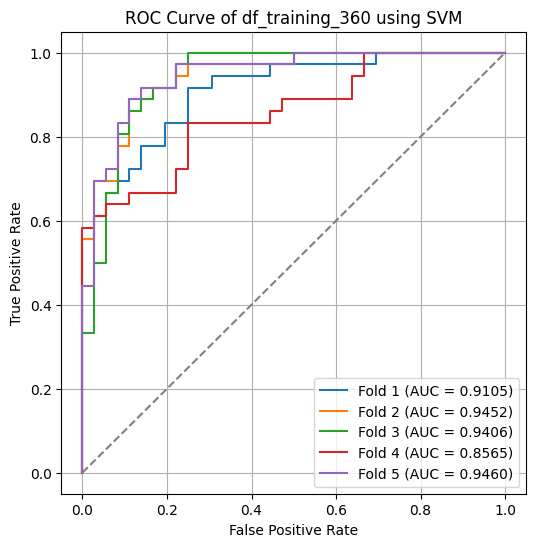

In [135]:
model_SVM_360 = train_SVM(df_training_360)

In [ ]:
#################################################################

In [131]:
# Train DNN model
def train_dnn(df, epochs=100, batch_size=64, n_splits=5, learning_rate=0.0005):
    # Separate features and target variable
    X = df.drop('CLASSIFIER', axis=1).values
    y = df['CLASSIFIER'].values

    # Cross-validation setup
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    metrics = {'AUC': [], 'Sensitivity': [], 'Specificity': [], 'PPV': [], 'NPV': [], 'F1-score': []}

    fold_number = 1
    all_y_true = []
    all_y_pred_probs = []
    fpr_list = []
    tpr_list = []

    print(f"Training DNN with {X.shape[0]} samples:")

    for train_index, test_index in skf.split(X, y):
        df_name = [name for name, val in globals().items() if val is df][0]  # Extract df's variable name
        print(f"\nFold {fold_number} of {df_name}:")

        # Split data
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Convert data to PyTorch tensors
        X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
        y_train = torch.tensor(y_train, dtype=torch.long).to(device)
        X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
        y_test = torch.tensor(y_test, dtype=torch.long).to(device)

        # Create TensorDatasets and DataLoaders
        train_dataset = TensorDataset(X_train, y_train)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        test_dataset = TensorDataset(X_test, y_test)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

        # Define the DNN model
        input_size = X_train.shape[1]
        model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        ).to(device)

        # Define loss function and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        # Training loop
        for epoch in range(epochs):
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

        # Evaluation for the fold
        with torch.no_grad():
            model.eval()
            y_true = []
            y_pred_probs = []
            for inputs, labels in test_loader:
                outputs = model(inputs)
                probs = torch.softmax(outputs, dim=1)[:, 1].cpu().numpy()  # Probability of class 1
                y_pred_probs.extend(probs)
                y_true.extend(labels.cpu().numpy())

            y_pred = (np.array(y_pred_probs) >= 0.5).astype(int)  # Convert probabilities to predictions

            # Calculate metrics
            auc = roc_auc_score(y_true, y_pred_probs)
            tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
            sensitivity = tp / (tp + fn)
            specificity = tn / (tn + fp)
            ppv = tp / (tp + fp) if (tp + fp) > 0 else np.nan
            npv = tn / (tn + fn) if (tn + fn) > 0 else np.nan
            accuracy = accuracy_score(y_true, y_pred)

            # Calculate F1-score
            f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity) if (ppv + sensitivity) > 0 else np.nan

            # Append metrics for the fold
            metrics['AUC'].append(auc)
            metrics['Sensitivity'].append(sensitivity)
            metrics['Specificity'].append(specificity)
            metrics['PPV'].append(ppv)
            metrics['NPV'].append(npv)
            metrics['F1-score'].append(f1)  # Add F1-score to metrics

            # Collect data for plotting ROC curve
            fpr, tpr, _ = roc_curve(y_test.cpu().numpy(), y_pred_probs)
            fpr_list.append(fpr)
            tpr_list.append(tpr)

            fold_number += 1

    # Calculate mean and 95% CI for each metric
    def compute_mean_ci(values):
        mean = np.mean(values)
        lower = np.percentile(values, 2.5)
        upper = np.percentile(values, 97.5)
        return mean, (lower, upper)

    for metric, values in metrics.items():
        mean, ci = compute_mean_ci(values)
        print(f"{metric}: {mean:.4f} (95% CI: {ci[0]:.4f} - {ci[1]:.4f})")

    # Calculate and display average F1-score
    avg_f1 = np.mean(metrics['F1'])

    # Plot ROC curve for each fold
    plt.figure(figsize=(6, 6))
    for i in range(n_splits):
        plt.plot(fpr_list[i], tpr_list[i], label=f'Fold {i+1} (AUC = {metrics["AUC"][i]:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve of {df_name} using DNN")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    return model

In [ ]:
# Train DNN models on different datasets
model_DNN_8180 = train_dnn(df_training_8180)

In [ ]:
model_DNN_360 = train_dnn(df_training_360)

In [ ]:
model_DNN_39135 = train_dnn(df_training)

In [ ]:
########################################################################################

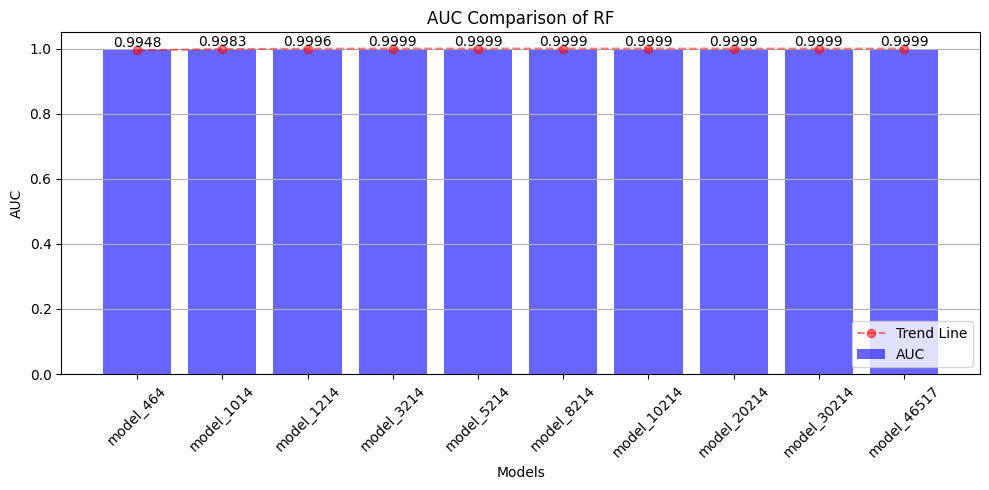

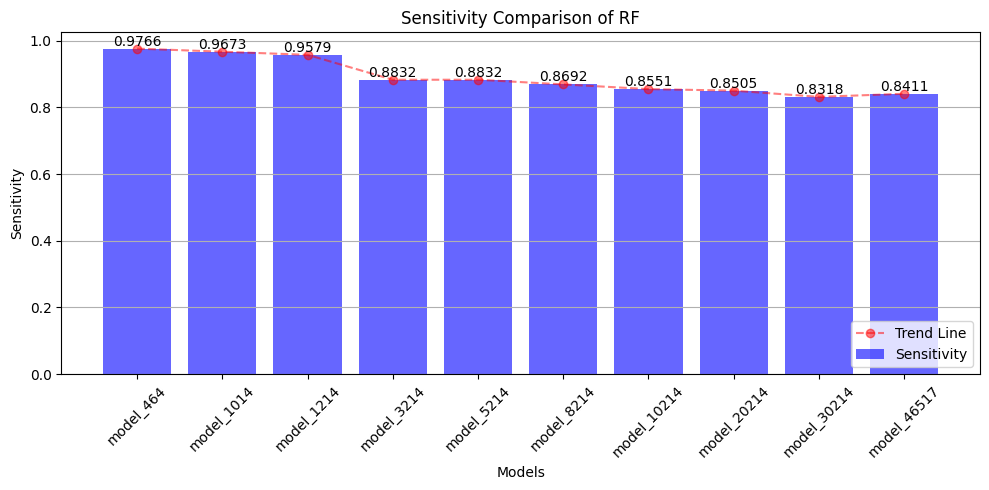

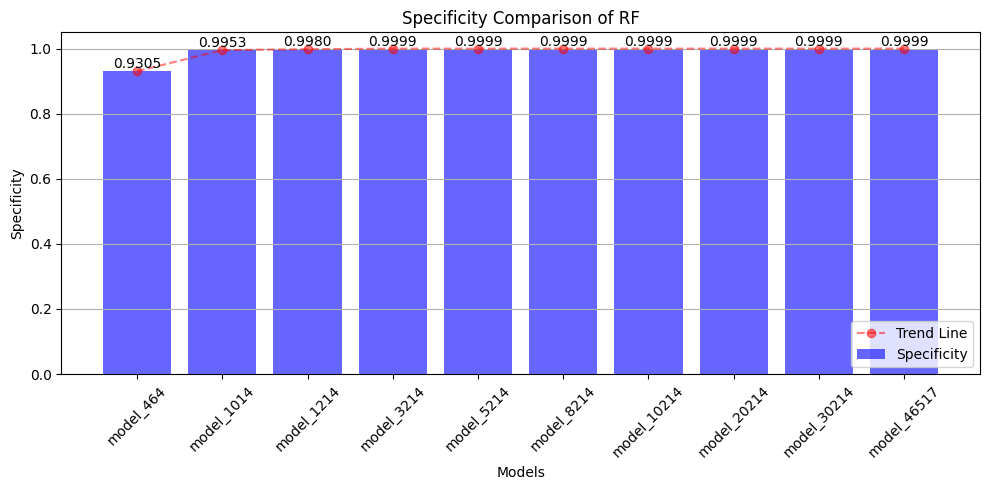

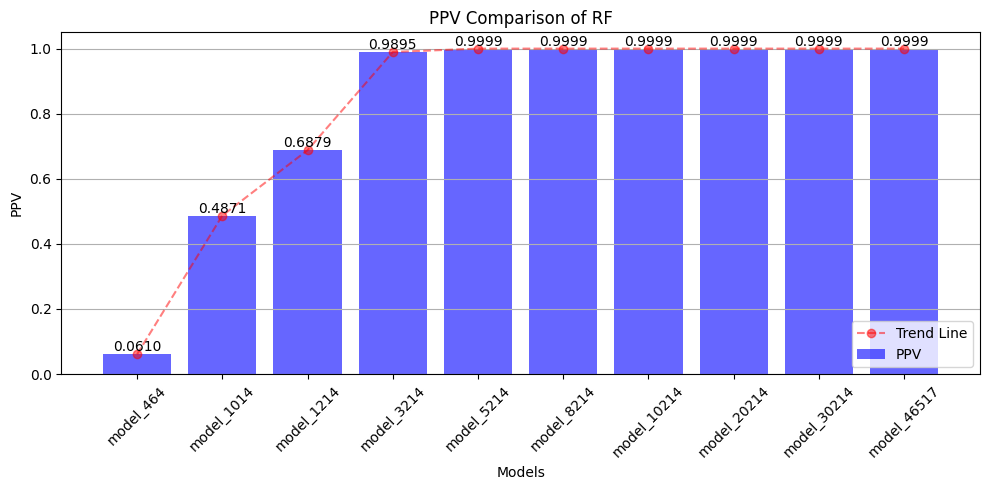

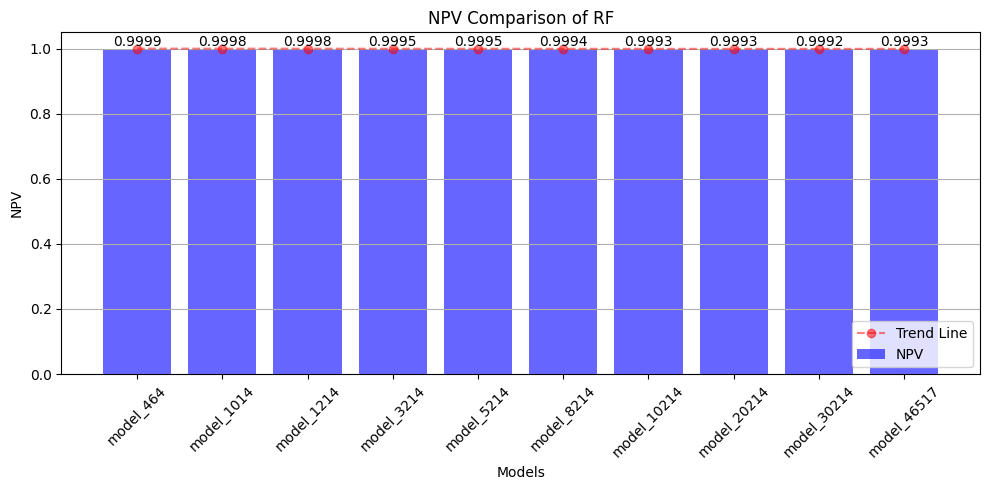

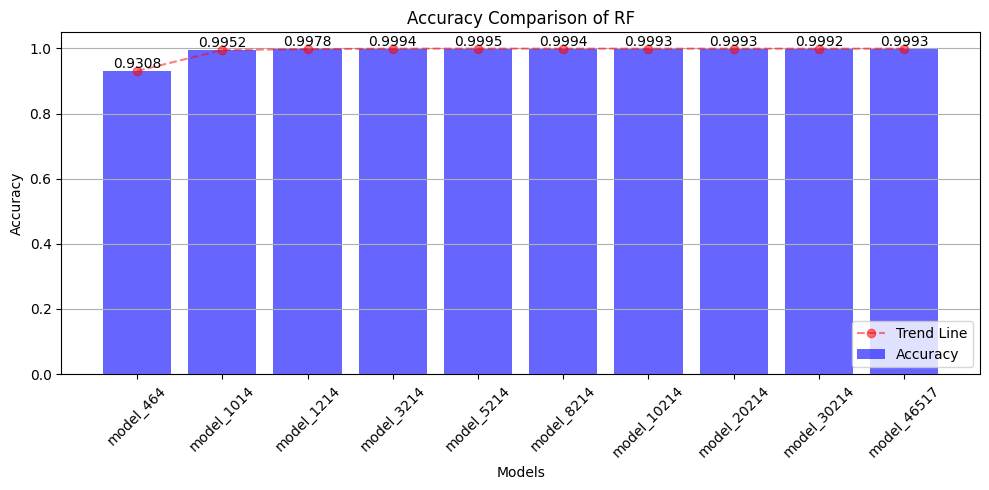

In [23]:
# Updated data for each metric based on the outputs of `evaluate_model`
metrics_updated = {
    'AUC': [0.9948, 0.9983, 0.9996, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999],
    'Sensitivity': [0.9766, 0.9673, 0.9579, 0.8832, 0.8832, 0.8692, 0.8551, 0.8505, 0.8318, 0.8411],
    'Specificity': [0.9305, 0.9953, 0.998, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999],
    'PPV': [0.061, 0.4871, 0.6879, 0.9895, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999],
    'NPV': [0.9999, 0.9998, 0.9998, 0.9995, 0.9995, 0.9994, 0.9993, 0.9993, 0.9992, 0.9993],
    'Accuracy': [0.9308, 0.9952, 0.9978, 0.9994, 0.9995, 0.9994, 0.9993, 0.9993, 0.9992, 0.9993]
}


# Models' names
models_updated = [
    "model_464",
    "model_1014",
    "model_1214",
    "model_3214",
    "model_5214",
    "model_8214",
    "model_10214",
    "model_20214",
    "model_30214",
    "model_46517"
]

# Plot each metric
for metric_name, metric_values in metrics_updated.items():
    x = np.arange(len(models_updated))
    fig, ax = plt.subplots(figsize=(10, 5))

    # Create bars
    bars = ax.bar(x, metric_values, color='b', alpha=0.6, label=f"{metric_name}")

    # Add value labels on top of each bar
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{metric_values[i]:.4f}',
                ha='center', va='bottom', rotation=0)

    # Add broken line connecting the actual points
    ax.plot(x, metric_values, "r--", alpha=0.5, label='Trend Line', marker='o')

    plt.xticks(x, models_updated, rotation=45)
    plt.xlabel("Models")
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} Comparison of RF")
    plt.legend(loc='lower right')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()